In [1]:
from bhpwave.spline import CubicSpline, BicubicSpline, TricubicSpline
import numpy as np

In [6]:
x = np.linspace(0.5, 1, 257)
y = np.linspace(-1, 1, 257)
z = np.linspace(2, 3, 257)
XYZ = np.meshgrid(x, y, z, indexing='ij')

In [7]:
def test_func(x, y, z):
    return np.sin(x)*np.cos(y)/(1-z**2)

In [8]:
fvec = test_func(*XYZ)

In [9]:
trispl = TricubicSpline(x, y, z, fvec)

In [10]:
1-trispl(0.51, 0.4, 2.4)/test_func(0.51, 0.4, 2.4)

9.819367541297197e-12

# Scratch

In [1]:
from bhpwave.trajectory.inspiral import IntegrateInspiralGeneratorBase
from bhpwave.trajectory.inspiral import TrajectoryData, InspiralGenerator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
traj = TrajectoryData()

In [3]:
from bhpwave.trajectory.inspiral import spin_of_chi, omega_of_a_alpha, pn_flux_noprefactor
from bhpwave.trajectory.geodesic import kerr_circ_geo_radius, kerr_isco_frequency, kerr_circ_geo_orbital_frequency

In [15]:
def Edot_test(chi, alpha, R):
    a = spin_of_chi(chi)
    omega = omega_of_a_alpha(a, alpha)
    r0 = kerr_circ_geo_radius(a, omega)
    if traj.range_check(a, omega):
        return traj.scaled_energy_flux(a, r0)/pn_flux_noprefactor(omega)*(1 - 0.5*R**2)
    else:
        return 0.

In [16]:
test_gen = IntegrateInspiralGeneratorBase(Edot_test)

In [17]:
insp_gen = InspiralGenerator()

In [18]:
insp = test_gen(10**6, 10, 0.99, 10., 6., 2., 0.)

In [19]:
insp2 = insp_gen(10**6, 10, 0.99, 10., 6., 2)

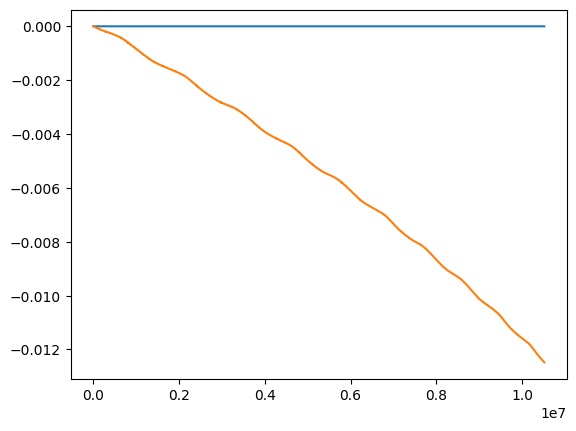

In [20]:
plt.plot(np.abs(1-insp2.radius[:insp.radius.size]/insp.radius[:insp2.radius.size]))
plt.plot(insp2.phase[:insp.phase.size] - insp.phase[:insp2.phase.size])

In [21]:
from bhpwave.waveform import KerrWaveform

In [22]:
kerr_gen = KerrWaveform(trajectory_data=test_gen)

In [23]:
kerr_gen_base = KerrWaveform()

In [24]:
M = 1e6  # primary mass in solar masses
mu = 3e1 # secondary mass in solar masses
a = 0.9 # dimensionless spin of the primary
p0 = 6.55 # initial semi-latus rectum
e0 = 0.0 # eccentricity is ignored for circular orbits
x0 = 1.0  # inclination is ignored for circular orbits
qK = 0.8  # polar angle of Kerr spin angular momentum
phiK = 0.2  # azimuthal angle of Kerr spin angular momentum
qS = 0.3  # polar sky angle
phiS = 0.3  # azimuthal sky angle
dist = 2.0  # distance to source in Gpc
Phi_phi0 = 0.2 # initial azimuthal position of the secondary
Phi_theta0 = 0.0 # ignored for circular orbits
Phi_r0 = 0.0 # ignored for circular orbits
dt = 5.0  # time steps in seconds
T = 1.0  # waveform duration in years

injection_paramters = [M, mu, a, p0, e0, x0, 
                       dist, qS, phiS, qK, phiK, 
                       Phi_phi0, Phi_theta0, Phi_r0, 
                       dt, T]

In [29]:
h = kerr_gen(*injection_paramters, 1.)
h_base = kerr_gen_base(*injection_paramters)

TypeError: KerrCircularWaveform.__call__() got multiple values for argument 'dt'